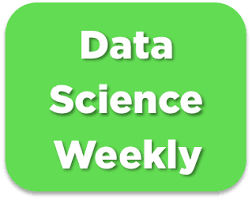

# Challenge : predict conversions 🏆🏆

This is the template that shows the different steps of the challenge. In this notebook, all the training/predictions steps are implemented for a very basic model (logistic regression with only one variable). Please use this template and feel free to change the preprocessing/training steps to get the model with the best f1-score ! May the force be with you 🧨🧨  

**For a detailed description of this project, please refer to *02-Conversion_rate_challenge.ipynb*.**

# Import libraries

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, confusion_matrix

from sklearn.ensemble import (
    BaggingClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    VotingClassifier,
    StackingClassifier,
)
from xgboost import XGBClassifier

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
# setting Jedha color palette as default
pio.templates["jedha"] = go.layout.Template(
    layout_colorway=["#4B9AC7", "#4BE8E0", "#9DD4F3", "#97FBF6", "#2A7FAF", "#23B1AB", "#0E3449", "#015955"]
)
pio.templates.default = "jedha"
pio.renderers.default = "svg" # to be replaced by "iframe" if working on JULIE
from IPython.display import display

# Read file with labels

In [2]:
data = pd.read_csv('conversion_data_train.csv')
print('Set with labels (our train+test) :', data.shape)

Set with labels (our train+test) : (284580, 6)


In [3]:
data.head()

,country,age,new_user,source,total_pages_visited,converted
0,China,22,1,Direct,2,0
1,UK,21,1,Ads,3,0
2,Germany,20,0,Seo,14,1
3,US,23,1,Seo,3,0
4,US,28,1,Direct,3,0


# Explore dataset

In [4]:
# The dataset is quite big : you must create a sample of the dataset before making any visualizations !
data_sample = data.sample(10000)

# Make your model

## Choose variables to use in the model, and create train and test sets
**From the EDA, we know that the most useful feature is total_pages_visited. Let's create a baseline model by using at first only this feature : in the next cells, we'll make preprocessings and train a simple (univariate) logistic regression.**

In [43]:
features_list = ['total_pages_visited']
numeric_indices = [0]
categorical_indices = []
target_variable = 'converted'

In [44]:
X = data.loc[:, features_list]
Y = data.loc[:, target_variable]

print('Explanatory variables : ', X.columns)
print()

Explanatory variables :  Index(['total_pages_visited'], dtype='object')



In [45]:
# Divide dataset Train set & Test set 
print("Dividing into train and test sets...")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=0)
print("...Done.")
print()

Dividing into train and test sets...
...Done.



## Training pipeline

In [46]:
# Put here all the preprocessings
print("Encoding categorical features and standardizing numerical features...")

featureencoder = StandardScaler()
X_train = featureencoder.fit_transform(X_train)
print("...Done")
print(X_train[0:5,:])

Encoding categorical features and standardizing numerical features...
...Done
[[-0.26070136]
 [ 0.93728655]
 [-0.85969532]
 [-0.56019834]
 [-0.26070136]]


In [47]:
# Train model
print("Train model...")
classifier = LogisticRegression() # 
classifier.fit(X_train, Y_train)
print("...Done.")

Train model...
...Done.


In [48]:
# Predictions on training set
print("Predictions on training set...")
Y_train_pred = classifier.predict(X_train)
print("...Done.")
print(Y_train_pred)
print()

Predictions on training set...
...Done.
[0 0 0 ... 0 0 0]



## Test pipeline

In [49]:
# Use X_test, and the same preprocessings as in training pipeline, 
# but call "transform()" instead of "fit_transform" methods (see example below)

print("Encoding categorical features and standardizing numerical features...")

X_test = featureencoder.transform(X_test)
print("...Done")
print(X_test[0:5,:])

Encoding categorical features and standardizing numerical features...
...Done
[[ 0.63778957]
 [ 0.03879562]
 [-0.26070136]
 [-0.26070136]
 [ 0.63778957]]


In [50]:
# Predictions on test set
print("Predictions on test set...")
Y_test_pred = classifier.predict(X_test)
print("...Done.")
print(Y_test_pred)
print()

Predictions on test set...
...Done.
[0 0 0 ... 0 0 0]



## Performance assessment

In [51]:
# WARNING : Use the same score as the one that will be used by Kaggle !
# Here, the f1-score will be used to assess the performances on the leaderboard
print("f1-score on train set : ", f1_score(Y_train, Y_train_pred))
print("f1-score on test set : ", f1_score(Y_test, Y_test_pred))

f1-score on train set :  0.6938517686692869
f1-score on test set :  0.7060240963855423


In [52]:
# You can also check more performance metrics to better understand what your model is doing
print("Confusion matrix on train set : ")
print(confusion_matrix(Y_train, Y_train_pred))
print()
print("Confusion matrix on test set : ")
print(confusion_matrix(Y_test, Y_test_pred))
print()

Confusion matrix on train set : 
[[246817   1082]
 [  3280   4943]]

Confusion matrix on test set : 
[[27384   117]
 [  371   586]]



**Our baseline model reaches a f1-score of almost 70%. Now, feel free to refine your model and try to beat this score ! 🚀🚀**

# Train best classifier on all data and use it to make predictions on X_without_labels
**Before making predictions on the file conversion_data_test.csv, let's train our model on ALL the data that was in conversion_data_train.csv. Sometimes, this allows to make tiny improvements in the score because we're using more examples to train the model.**

In [53]:
# Concatenate our train and test set to train your best classifier on all data with labels
X = np.append(X_train,X_test,axis=0)
Y = np.append(Y_train,Y_test)

classifier.fit(X,Y)

LogisticRegression()

In [54]:
# Read data without labels
data_without_labels = pd.read_csv('conversion_data_test.csv')
print('Prediction set (without labels) :', data_without_labels.shape)

# Warning : check consistency of features_list (must be the same than the features 
# used by your best classifier)
features_list = ['total_pages_visited']
X_without_labels = data_without_labels.loc[:, features_list]

# Convert pandas DataFrames to numpy arrays before using scikit-learn
print("Convert pandas DataFrames to numpy arrays...")
X_without_labels = X_without_labels.values
print("...Done")

print(X_without_labels[0:5,:])

Prediction set (without labels) : (31620, 5)
Convert pandas DataFrames to numpy arrays...
...Done
[[16]
 [ 5]
 [ 1]
 [ 6]
 [ 3]]


In [55]:
# WARNING : PUT HERE THE SAME PREPROCESSING AS FOR YOUR TEST SET
# CHECK YOU ARE USING X_without_labels
print("Encoding categorical features and standardizing numerical features...")

X_without_labels = featureencoder.transform(X_without_labels)
print("...Done")
print(X_without_labels[0:5,:])

Encoding categorical features and standardizing numerical features...
...Done
[[ 3.33326238]
 [ 0.03879562]
 [-1.15919229]
 [ 0.3382926 ]
 [-0.56019834]]


c:\Users\yousr\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



In [56]:
# Make predictions and dump to file
# WARNING : MAKE SURE THE FILE IS A CSV WITH ONE COLUMN NAMED 'converted' AND NO INDEX !
# WARNING : FILE NAME MUST HAVE FORMAT 'conversion_data_test_predictions_[name].csv'
# where [name] is the name of your team/model separated by a '-'
# For example : [name] = AURELIE-model1
data = {
    'converted': classifier.predict(X_without_labels)
}

Y_predictions = pd.DataFrame(columns=['converted'],data=data)
Y_predictions.to_csv('conversion_data_test_predictions_EXAMPLE.csv', index=False)


## Analyzing the coefficients and interpreting the result
**In this template, we just trained a model with only one feature (total_pages_visited), so there's no analysis to be done about the feature importance 🤔**

**Once you've included more features in your model, please take some time to analyze the model's parameters and try to find some lever for action to improve the newsletter's conversion rate 😎😎**

# TRYING MY FIRST MODEL 


# Logistic regression

Logistic regression with all the columns of the dataset in features list:

In [5]:
data = pd.read_csv('conversion_data_train.csv')
print('Set with labels (our train+test) :', data.shape)

Set with labels (our train+test) : (284580, 6)


In [6]:
data.head()

,country,age,new_user,source,total_pages_visited,converted
0,China,22,1,Direct,2,0
1,UK,21,1,Ads,3,0
2,Germany,20,0,Seo,14,1
3,US,23,1,Seo,3,0
4,US,28,1,Direct,3,0


In [7]:
# The dataset is quite big : you must create a sample of the dataset before making any visualizations !
data_sample = data.sample(10000)

In [8]:
# Basic stats
print("Number of rows : {}".format(data.shape[0]))
print()

print("Number of columns : {}".format(data.shape[1]))
print()

print("Display of dataset: ")
display(data.head())
print()

print("Basics statistics: ")
data_desc = data.describe(include='all')
display(data_desc)
print()

print("Percentage of missing values: ")
display(100*data.isnull().sum()/data.shape[0])

Number of rows : 284580

Number of columns : 6

Display of dataset: 


,country,age,new_user,source,total_pages_visited,converted
0,China,22,1,Direct,2,0
1,UK,21,1,Ads,3,0
2,Germany,20,0,Seo,14,1
3,US,23,1,Seo,3,0
4,US,28,1,Direct,3,0



Basics statistics: 


,country,age,new_user,source,total_pages_visited,converted
count,284580,284580.000000,284580.000000,284580,284580.000000,284580.000000
unique,4,NaN,NaN,3,NaN,NaN
top,US,NaN,NaN,Seo,NaN,NaN
freq,160124,NaN,NaN,139477,NaN,NaN
mean,NaN,30.564203,0.685452,NaN,4.873252,0.032258
std,NaN,8.266789,0.464336,NaN,3.341995,0.176685
min,NaN,17.000000,0.000000,NaN,1.000000,0.000000
25%,NaN,24.000000,0.000000,NaN,2.000000,0.000000
50%,NaN,30.000000,1.000000,NaN,4.000000,0.000000
75%,NaN,36.000000,1.000000,NaN,7.000000,0.000000



Percentage of missing values: 


country                0.0
age                    0.0
new_user               0.0
source                 0.0
total_pages_visited    0.0
converted              0.0
dtype: float64

In [9]:
data = data.loc[data['age'] < (data['age'].mean())+(data['age'].std()*4)]

In [12]:
data.info

<bound method DataFrame.info of         country  age  new_user  source  total_pages_visited  converted
0         China   22         1  Direct                    2          0
1            UK   21         1     Ads                    3          0
2       Germany   20         0     Seo                   14          1
3            US   23         1     Seo                    3          0
4            US   28         1  Direct                    3          0
...         ...  ...       ...     ...                  ...        ...
284575       US   36         1     Ads                    1          0
284576       US   31         1     Seo                    2          0
284577       US   41         1     Seo                    5          0
284578       US   31         1  Direct                    4          0
284579       US   26         0     Ads                    3          0

[284515 rows x 6 columns]>

In [13]:
features_list = ['country','age','new_user','source','total_pages_visited']
target_variable = 'converted'

In [14]:
X = data.loc[:, features_list]
Y = data.loc[:, target_variable]

print('Explanatory variables : ', X.columns)
print()

Explanatory variables :  Index(['country', 'age', 'new_user', 'source', 'total_pages_visited'], dtype='object')



In [15]:
# Divide dataset Train set & Test set 
print("Dividing into train and test sets...")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=0)
print("...Done.")
print()

Dividing into train and test sets...
...Done.



In [16]:
# Put here all the preprocessings
print("Encoding categorical features and standardizing numerical features...")

numeric_features = ['age','new_user','total_pages_visited']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])


categorical_features = ['country','source']
categorical_transformer = Pipeline(
    steps=[
    ('encoder', OneHotEncoder(drop='first')) # first column will be dropped to avoid creating correlations between features
    ])

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),    
        ('num', numeric_transformer, numeric_features)
        ]
    )

X_train = preprocessor.fit_transform(X_train)

print("...Done!")
print(X_train[0:5,:])

Encoding categorical features and standardizing numerical features...
...Done!
[[ 0.          1.          0.          0.          1.         -1.15899784
   0.67788086  0.0377522 ]
 [ 0.          1.          0.          0.          1.         -0.43107853
   0.67788086  0.3368716 ]
 [ 0.          0.          1.          1.          0.          1.02476009
   0.67788086 -0.85960601]
 [ 0.          0.          0.          1.          0.          0.1755209
   0.67788086  0.0377522 ]
 [ 0.          0.          1.          0.          0.         -0.30975864
  -1.47518547  0.0377522 ]]


In [17]:
# Train model
print("Train model...")
classifier = LogisticRegression() 
classifier.fit(X_train, Y_train)
print("...Done.")

Train model...
...Done.


In [18]:
# Predictions on training set
print("Predictions on training set...")
Y_train_pred = classifier.predict(X_train)
print("...Done.")
print(Y_train_pred)
print()

Predictions on training set...
...Done.
[0 0 0 ... 0 0 0]



In [19]:
# Use X_test, and the same preprocessings as in training pipeline, 
# but call "transform()" instead of "fit_transform" methods (see example below)

print("Encoding categorical features and standardizing numerical features...")

X_test = preprocessor.transform(X_test)
print("...Done")
print(X_test[0:5,:])

Encoding categorical features and standardizing numerical features...
...Done
[[ 1.          0.          0.          0.          1.          0.66080044
  -1.47518547 -0.85960601]
 [ 0.          0.          0.          1.          0.          0.05420101
  -1.47518547  0.635991  ]
 [ 1.          0.          0.          0.          1.          0.05420101
   0.67788086 -0.56048661]
 [ 0.          0.          0.          0.          0.         -0.30975864
   0.67788086  0.3368716 ]
 [ 0.          0.          0.          1.          0.         -1.64427738
  -1.47518547  0.0377522 ]]


In [20]:
# Predictions on test set
print("Predictions on test set...")
Y_test_pred = classifier.predict(X_test)
print("...Done.")
print(Y_test_pred)
print()

Predictions on test set...
...Done.
[0 0 0 ... 0 0 0]



In [21]:
# WARNING : Use the same score as the one that will be used by Kaggle !
# Here, the f1-score will be used to assess the performances on the leaderboard
print("f1-score on train set : ", f1_score(Y_train, Y_train_pred))
print("f1-score on test set : ", f1_score(Y_test, Y_test_pred))

f1-score on train set :  0.7627639668537823
f1-score on test set :  0.771712158808933


In [22]:
# You can also check more performance metrics to better understand what your model is doing
print("Confusion matrix on train set : ")
print(confusion_matrix(Y_train, Y_train_pred))
print()
print("Confusion matrix on test set : ")
print(confusion_matrix(Y_test, Y_test_pred))
print()

Confusion matrix on train set : 
[[246806    969]
 [  2581   5707]]

Confusion matrix on test set : 
[[27462   100]
 [  268   622]]



In [23]:
# Concatenate our train and test set to train your best classifier on all data with labels
X = np.append(X_train,X_test,axis=0)
Y = np.append(Y_train,Y_test)

classifier.fit(X,Y)

LogisticRegression()

In [24]:
# Read data without labels
data_without_labels = pd.read_csv('conversion_data_test.csv')
print('Prediction set (without labels) :', data_without_labels.shape)

# Warning : check consistency of features_list (must be the same than the features 
# used by your best classifier)
features_list = ['country','age','new_user','source','total_pages_visited']
X_without_labels = data_without_labels.loc[:, features_list]

# Convert pandas DataFrames to numpy arrays before using scikit-learn
print("Convert pandas DataFrames to numpy arrays...")
#X_without_labels = X_without_labels.values
print("...Done")

print(X_without_labels[0:5])

Prediction set (without labels) : (31620, 5)
Convert pandas DataFrames to numpy arrays...
...Done
  country  age  new_user  source  total_pages_visited
0      UK   28         0     Seo                   16
1      UK   22         1  Direct                    5
2   China   32         1     Seo                    1
3      US   32         1     Ads                    6
4   China   25         0     Seo                    3


In [25]:
# WARNING : PUT HERE THE SAME PREPROCESSING AS FOR YOUR TEST SET
# CHECK YOU ARE USING X_without_labels
print("Encoding categorical features and standardizing numerical features...")

X_without_labels = preprocessor.transform(X_without_labels)
print("...Done")
print(X_without_labels[0:5])

Encoding categorical features and standardizing numerical features...
...Done
[[ 0.          1.          0.          0.          1.         -0.30975864
  -1.47518547  3.32806563]
 [ 0.          1.          0.          1.          0.         -1.03767795
   0.67788086  0.0377522 ]
 [ 0.          0.          0.          0.          1.          0.1755209
   0.67788086 -1.15872542]
 [ 0.          0.          1.          0.          0.          0.1755209
   0.67788086  0.3368716 ]
 [ 0.          0.          0.          0.          1.         -0.6737183
  -1.47518547 -0.56048661]]


In [26]:
# Make predictions and dump to file
# WARNING : MAKE SURE THE FILE IS A CSV WITH ONE COLUMN NAMED 'converted' AND NO INDEX !
# WARNING : FILE NAME MUST HAVE FORMAT 'conversion_data_test_predictions_[name].csv'
# where [name] is the name of your team/model separated by a '-'
# For example : [name] = AURELIE-model1
data = {
    'converted': classifier.predict(X_without_labels)
}

Y_predictions = pd.DataFrame(columns=['converted'],data=data)
Y_predictions.to_csv('conversion_data_test_predictions_yousra-model6.csv', index=False)

# Decision Tree

In [75]:
data = pd.read_csv('conversion_data_train.csv')
print('Set with labels (our train+test) :', data.shape)

Set with labels (our train+test) : (284580, 6)


In [76]:
data.head()

,country,age,new_user,source,total_pages_visited,converted
0,China,22,1,Direct,2,0
1,UK,21,1,Ads,3,0
2,Germany,20,0,Seo,14,1
3,US,23,1,Seo,3,0
4,US,28,1,Direct,3,0


In [77]:
# The dataset is quite big : you must create a sample of the dataset before making any visualizations !
data_sample = data.sample(10000)

In [78]:
features_list = ['country','age','new_user','source','total_pages_visited']
target_variable = 'converted'

In [79]:
X = data.loc[:, features_list]
Y = data.loc[:, target_variable]

print('Explanatory variables : ', X.columns)
print()

Explanatory variables :  Index(['country', 'age', 'new_user', 'source', 'total_pages_visited'], dtype='object')



In [80]:
# Divide dataset Train set & Test set 
print("Dividing into train and test sets...")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=0)
print("...Done.")
print()

Dividing into train and test sets...
...Done.



In [81]:
# Put here all the preprocessings
print("Encoding categorical features and standardizing numerical features...")

numeric_features = ['age','new_user','total_pages_visited']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])


categorical_features = ['country','source']
categorical_transformer = Pipeline(
    steps=[
    ('encoder', OneHotEncoder(drop='first')) # first column will be dropped to avoid creating correlations between features
    ])

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),    
        ('num', numeric_transformer, numeric_features)
        ]
    )


Encoding categorical features and standardizing numerical features...


In [82]:
# Preprocessings on train set
print("Performing preprocessings on train set...")
print(X_train.head())
X_train = preprocessor.fit_transform(X_train)
print("...Done.")
print(
    X_train[0:5]
)  # MUST use this syntax because X_train is a numpy array and not a pandas DataFrame anymore
print()


# Preprocessings on test set
print("Performing preprocessings on test set...")
print(X_test.head())
X_test = preprocessor.transform(
    X_test
)  # Don't fit again !! The test set is used for validating decisions
# we made based on the training set, therefore we can only apply transformations that were parametered using the training set.
# Otherwise this creates what is called a leak from the test set which will introduce a bias in all your results.
print("...Done.")
print(
    X_test[0:5, :]
)  # MUST use this syntax because X_test is a numpy array and not a pandas DataFrame anymore
print()

Performing preprocessings on train set...
       country  age  new_user  source  total_pages_visited
206830   China   23         0  Direct                    4
238315      US   25         1  Direct                    8
255325      US   32         1     Seo                    2
106283      US   37         1     Seo                    3
46283       UK   24         1  Direct                    4
...Done.
[[ 0.          0.          0.          1.          0.         -0.91516278
  -1.47729174 -0.26070136]
 [ 0.          0.          1.          1.          0.         -0.67320988
   0.67691437  0.93728655]
 [ 0.          0.          1.          0.          1.          0.17362526
   0.67691437 -0.85969532]
 [ 0.          0.          1.          0.          1.          0.7785075
   0.67691437 -0.56019834]
 [ 0.          1.          0.          1.          0.         -0.79418633
   0.67691437 -0.26070136]]

Performing preprocessings on test set...
        country  age  new_user source  total_pag

In [27]:
# Perform grid search
print("Grid search...")
classifier = DecisionTreeClassifier()

# Grid of values to be tested
params = {
    "max_depth": [4, 6, 8, 10],
    "min_samples_leaf": [1, 2, 5],
    "min_samples_split": [2, 4, 8],
}
gridsearch = GridSearchCV(
    classifier, param_grid=params, cv=3
)  # cv : the number of folds to be used for CV
gridsearch.fit(X_train, Y_train)
print("...Done.")
print("Best hyperparameters : ", gridsearch.best_params_)
print("Best validation accuracy : ", gridsearch.best_score_)

Grid search...
...Done.
Best hyperparameters :  {'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 8}
Best validation accuracy :  0.984972447240545


In [28]:
# Predictions on training set
print("Predictions on training set...")
Y_train_pred = gridsearch.predict(X_train)
print("...Done.")
print(Y_train_pred)
print()

# It's also possible to get the probabilities estimated by the model:
print("Probabilities on training set...")
Y_train_proba = gridsearch.predict_proba(X_train)
print("...Done.")
print(Y_train_proba)
print()

Predictions on training set...
...Done.
[0 0 0 ... 0 0 0]

Probabilities on training set...
...Done.
[[9.99277382e-01 7.22617942e-04]
 [9.97817653e-01 2.18234724e-03]
 [9.99972478e-01 2.75216733e-05]
 ...
 [9.99749969e-01 2.50031254e-04]
 [1.00000000e+00 0.00000000e+00]
 [9.52196382e-01 4.78036176e-02]]



In [85]:
# Predictions on test set
print("Predictions on test set...")
Y_test_pred = gridsearch.predict(X_test)
print("...Done.")
print(Y_test_pred)
print()

# It's also possible to get the probabilities estimated by the model:
print("Probabilities on test set...")
Y_test_proba = gridsearch.predict_proba(X_test)
print("...Done.")
print(Y_test_proba)
print()

Predictions on test set...
...Done.
[0 0 0 ... 0 0 0]

Probabilities on test set...
...Done.
[[9.96674848e-01 3.32515240e-03]
 [9.99580461e-01 4.19538508e-04]
 [9.98151868e-01 1.84813178e-03]
 ...
 [9.44278011e-01 5.57219892e-02]
 [9.99883327e-01 1.16672500e-04]
 [9.99911480e-01 8.85201953e-05]]



In [29]:
# WARNING : Use the same score as the one that will be used by Kaggle !
# Here, the f1-score will be used to assess the performances on the leaderboard
print("f1-score on train set : ", f1_score(Y_train, Y_train_pred))
print("f1-score on test set : ", f1_score(Y_test, Y_test_pred))

f1-score on train set :  0.7729520245890685
f1-score on test set :  0.771712158808933


In [30]:
# You can also check more performance metrics to better understand what your model is doing
print("Confusion matrix on train set : ")
print(confusion_matrix(Y_train, Y_train_pred))
print()
print("Confusion matrix on test set : ")
print(confusion_matrix(Y_test, Y_test_pred))
print()

Confusion matrix on train set : 
[[246881    894]
 [  2504   5784]]

Confusion matrix on test set : 
[[27462   100]
 [  268   622]]



In [31]:
# Concatenate our train and test set to train your best classifier on all data with labels
X = np.append(X_train,X_test,axis=0)
Y = np.append(Y_train,Y_test)

classifier.fit(X,Y)

DecisionTreeClassifier()

In [32]:
# Read data without labels
data_without_labels = pd.read_csv('conversion_data_test.csv')
print('Prediction set (without labels) :', data_without_labels.shape)

# Warning : check consistency of features_list (must be the same than the features 
# used by your best classifier)
features_list = ['country','age','new_user','source','total_pages_visited']
X_without_labels = data_without_labels.loc[:, features_list]

# Convert pandas DataFrames to numpy arrays before using scikit-learn
print("Convert pandas DataFrames to numpy arrays...")
#X_without_labels = X_without_labels.values
print("...Done")

print(X_without_labels[0:5])

Prediction set (without labels) : (31620, 5)
Convert pandas DataFrames to numpy arrays...
...Done
  country  age  new_user  source  total_pages_visited
0      UK   28         0     Seo                   16
1      UK   22         1  Direct                    5
2   China   32         1     Seo                    1
3      US   32         1     Ads                    6
4   China   25         0     Seo                    3


In [33]:
# WARNING : PUT HERE THE SAME PREPROCESSING AS FOR YOUR TEST SET
# CHECK YOU ARE USING X_without_labels
print("Encoding categorical features and standardizing numerical features...")

X_without_labels = preprocessor.transform(X_without_labels)
print("...Done")
print(X_without_labels[0:5])

Encoding categorical features and standardizing numerical features...
...Done
[[ 0.          1.          0.          0.          1.         -0.30975864
  -1.47518547  3.32806563]
 [ 0.          1.          0.          1.          0.         -1.03767795
   0.67788086  0.0377522 ]
 [ 0.          0.          0.          0.          1.          0.1755209
   0.67788086 -1.15872542]
 [ 0.          0.          1.          0.          0.          0.1755209
   0.67788086  0.3368716 ]
 [ 0.          0.          0.          0.          1.         -0.6737183
  -1.47518547 -0.56048661]]


In [34]:
# Make predictions and dump to file
# WARNING : MAKE SURE THE FILE IS A CSV WITH ONE COLUMN NAMED 'converted' AND NO INDEX !
# WARNING : FILE NAME MUST HAVE FORMAT 'conversion_data_test_predictions_[name].csv'
# where [name] is the name of your team/model separated by a '-'
# For example : [name] = AURELIE-model1
data = {
    'converted': classifier.predict(X_without_labels)
}

Y_predictions = pd.DataFrame(columns=['converted'],data=data)
Y_predictions.to_csv('conversion_data_test_predictions_yousra-model7.csv', index=False)

# Bagging Classifier with Logistic Regression Estimator

In [92]:
data = pd.read_csv('conversion_data_train.csv')
print('Set with labels (our train+test) :', data.shape)

Set with labels (our train+test) : (284580, 6)


In [93]:
# The dataset is quite big : you must create a sample of the dataset before making any visualizations !
data_sample = data.sample(10000)

In [94]:
features_list = ['country','age','new_user','source','total_pages_visited']
target_variable = 'converted'

In [95]:
X = data.loc[:, features_list]
Y = data.loc[:, target_variable]

print('Explanatory variables : ', X.columns)
print()

Explanatory variables :  Index(['country', 'age', 'new_user', 'source', 'total_pages_visited'], dtype='object')



In [96]:
# Divide dataset Train set & Test set 
print("Dividing into train and test sets...")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=0)
print("...Done.")
print()

Dividing into train and test sets...
...Done.



In [97]:
# Put here all the preprocessings
print("Encoding categorical features and standardizing numerical features...")

numeric_features = ['age','new_user','total_pages_visited']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])


categorical_features = ['country','source']
categorical_transformer = Pipeline(
    steps=[
    ('encoder', OneHotEncoder(drop='first')) # first column will be dropped to avoid creating correlations between features
    ])

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),    
        ('num', numeric_transformer, numeric_features)
        ]
    )


Encoding categorical features and standardizing numerical features...


In [98]:
# Preprocessings on train set
print("Performing preprocessings on train set...")
print(X_train.head())
X_train = preprocessor.fit_transform(X_train)
print("...Done.")
print(
    X_train[0:5]
)  # MUST use this syntax because X_train is a numpy array and not a pandas DataFrame anymore
print()


# Preprocessings on test set
print("Performing preprocessings on test set...")
print(X_test.head())
X_test = preprocessor.transform(
    X_test
)  # Don't fit again !! The test set is used for validating decisions
# we made based on the training set, therefore we can only apply transformations that were parametered using the training set.
# Otherwise this creates what is called a leak from the test set which will introduce a bias in all your results.
print("...Done.")
print(
    X_test[0:5, :]
)  # MUST use this syntax because X_test is a numpy array and not a pandas DataFrame anymore
print()

Performing preprocessings on train set...
       country  age  new_user  source  total_pages_visited
206830   China   23         0  Direct                    4
238315      US   25         1  Direct                    8
255325      US   32         1     Seo                    2
106283      US   37         1     Seo                    3
46283       UK   24         1  Direct                    4


...Done.
[[ 0.          0.          0.          1.          0.         -0.91516278
  -1.47729174 -0.26070136]
 [ 0.          0.          1.          1.          0.         -0.67320988
   0.67691437  0.93728655]
 [ 0.          0.          1.          0.          1.          0.17362526
   0.67691437 -0.85969532]
 [ 0.          0.          1.          0.          1.          0.7785075
   0.67691437 -0.56019834]
 [ 0.          1.          0.          1.          0.         -0.79418633
   0.67691437 -0.26070136]]

Performing preprocessings on test set...
        country  age  new_user source  total_pages_visited
149371       US   20         1    Ads                    7
221325       US   31         1    Seo                    5
14016        US   28         0    Seo                    4
257982  Germany   25         1    Ads                    4
59983        US   44         0    Ads                    7
...Done.
[[ 0.          0.          1.          0.          0.         -1.27809213
   0.67

In [99]:
# Perform grid search
print("Grid search...")
logistic_regression = LogisticRegression(
    max_iter=1000
)  # max_iter changed because of convergence warning
classifier = BaggingClassifier(estimator=logistic_regression)

# Grid of values to be tested
params = {
    "estimator__C": [
        0.01,
        0.05,
        0.1,
        0.5,
    ],  # base_estimator__ prefix because C is a parameter from LogisticRegression!
    "n_estimators": [
        5,
        10,
        20,
        30,
    ],  # n_estimators is a hyperparameter of the ensemble method
}
print(params)
gridsearch = GridSearchCV(
    classifier, param_grid=params, cv=3
)  # cv : the number of folds to be used for CV
gridsearch.fit(X_train, Y_train)
print("...Done.")
print("Best hyperparameters : ", gridsearch.best_params_)
print("Best validation accuracy : ", gridsearch.best_score_)
print()
print("Accuracy on training set : ", gridsearch.score(X_train, Y_train))
print("Accuracy on test set : ", gridsearch.score(X_test, Y_test))

Grid search...
{'estimator__C': [0.01, 0.05, 0.1, 0.5], 'n_estimators': [5, 10, 20, 30]}
...Done.
Best hyperparameters :  {'estimator__C': 0.5, 'n_estimators': 30}
Best validation accuracy :  0.9863034022848486

Accuracy on training set :  0.9863190198421065
Accuracy on test set :  0.9854171059104645


In [100]:
# Predictions on training set
print("Predictions on training set...")
Y_train_pred = gridsearch.predict(X_train)
print("...Done.")
print(Y_train_pred)
print()

# It's also possible to get the probabilities estimated by the model:
print("Probabilities on training set...")
Y_train_proba = gridsearch.predict_proba(X_train)
print("...Done.")
print(Y_train_proba)
print()

Predictions on training set...
...Done.
[0 0 0 ... 0 0 0]

Probabilities on training set...
...Done.
[[9.99866599e-01 1.33400540e-04]
 [9.92064436e-01 7.93556382e-03]
 [9.99937754e-01 6.22458298e-05]
 ...
 [9.98384135e-01 1.61586516e-03]
 [9.98582383e-01 1.41761663e-03]
 [9.99883288e-01 1.16711705e-04]]



In [101]:
# Predictions on test set
print("Predictions on test set...")
Y_test_pred = gridsearch.predict(X_test)
print("...Done.")
print(Y_test_pred)
print()

# It's also possible to get the probabilities estimated by the model:
print("Probabilities on test set...")
Y_test_proba = gridsearch.predict_proba(X_test)
print("...Done.")
print(Y_test_proba)
print()

Predictions on test set...
...Done.
[0 0 0 ... 0 0 0]

Probabilities on test set...
...Done.
[[9.93400441e-01 6.59955886e-03]
 [9.99353551e-01 6.46449187e-04]
 [9.97842015e-01 2.15798485e-03]
 ...
 [9.75976805e-01 2.40231953e-02]
 [9.99782715e-01 2.17285378e-04]
 [9.99729468e-01 2.70532371e-04]]



In [102]:
# WARNING : Use the same score as the one that will be used by Kaggle !
# Here, the f1-score will be used to assess the performances on the leaderboard
print("f1-score on train set : ", f1_score(Y_train, Y_train_pred))
print("f1-score on test set : ", f1_score(Y_test, Y_test_pred))

f1-score on train set :  0.7641357027463651
f1-score on test set :  0.7577349678925861


In [103]:
# You can also check more performance metrics to better understand what your model is doing
print("Confusion matrix on train set : ")
print(confusion_matrix(Y_train, Y_train_pred))
print()
print("Confusion matrix on test set : ")
print(confusion_matrix(Y_test, Y_test_pred))
print()

Confusion matrix on train set : 
[[246942    957]
 [  2547   5676]]

Confusion matrix on test set : 
[[27394   107]
 [  308   649]]



In [104]:
# Concatenate our train and test set to train your best classifier on all data with labels
X = np.append(X_train,X_test,axis=0)
Y = np.append(Y_train,Y_test)

classifier.fit(X,Y)

BaggingClassifier(estimator=LogisticRegression(max_iter=1000))

In [105]:
# Read data without labels
data_without_labels = pd.read_csv('conversion_data_test.csv')
print('Prediction set (without labels) :', data_without_labels.shape)

# Warning : check consistency of features_list (must be the same than the features 
# used by your best classifier)
features_list = ['country','age','new_user','source','total_pages_visited']
X_without_labels = data_without_labels.loc[:, features_list]

# Convert pandas DataFrames to numpy arrays before using scikit-learn
print("Convert pandas DataFrames to numpy arrays...")
#X_without_labels = X_without_labels.values
print("...Done")

print(X_without_labels[0:5])

Prediction set (without labels) : (31620, 5)
Convert pandas DataFrames to numpy arrays...
...Done
  country  age  new_user  source  total_pages_visited
0      UK   28         0     Seo                   16
1      UK   22         1  Direct                    5
2   China   32         1     Seo                    1
3      US   32         1     Ads                    6
4   China   25         0     Seo                    3


In [106]:
# WARNING : PUT HERE THE SAME PREPROCESSING AS FOR YOUR TEST SET
# CHECK YOU ARE USING X_without_labels
print("Encoding categorical features and standardizing numerical features...")

X_without_labels = preprocessor.transform(X_without_labels)
print("...Done")
print(X_without_labels[0:5])

Encoding categorical features and standardizing numerical features...
...Done
[[ 0.          1.          0.          0.          1.         -0.31028053
  -1.47729174  3.33326238]
 [ 0.          1.          0.          1.          0.         -1.03613923
   0.67691437  0.03879562]
 [ 0.          0.          0.          0.          1.          0.17362526
   0.67691437 -1.15919229]
 [ 0.          0.          1.          0.          0.          0.17362526
   0.67691437  0.3382926 ]
 [ 0.          0.          0.          0.          1.         -0.67320988
  -1.47729174 -0.56019834]]


In [107]:
# Make predictions and dump to file
# WARNING : MAKE SURE THE FILE IS A CSV WITH ONE COLUMN NAMED 'converted' AND NO INDEX !
# WARNING : FILE NAME MUST HAVE FORMAT 'conversion_data_test_predictions_[name].csv'
# where [name] is the name of your team/model separated by a '-'
# For example : [name] = AURELIE-model1
data = {
    'converted': classifier.predict(X_without_labels)
}

Y_predictions = pd.DataFrame(columns=['converted'],data=data)
Y_predictions.to_csv('conversion_data_test_predictions_yousra-model3.csv', index=False)

# Bagging with Decision Tree Estimator

In [108]:
# Perform grid search
print("Grid search...")
decision_tree = DecisionTreeClassifier()
classifier = BaggingClassifier(estimator=decision_tree)

# Grid of values to be tested
params = {
    "estimator__max_depth": [1, 2, 3],
    "estimator__min_samples_leaf": [1, 2, 3],
    "estimator__min_samples_split": [2, 3, 4],
    "n_estimators": [2, 4, 6, 8, 10],
}
print(params)
gridsearch = GridSearchCV(
    classifier, param_grid=params, cv=3
)  # cv : the number of folds to be used for CV
gridsearch.fit(X_train, Y_train)
print("...Done.")
print("Best hyperparameters : ", gridsearch.best_params_)
print("Best validation accuracy : ", gridsearch.best_score_)
print()
print("Accuracy on training set : ", gridsearch.score(X_train, Y_train))
print("Accuracy on test set : ", gridsearch.score(X_test, Y_test))

Grid search...
{'estimator__max_depth': [1, 2, 3], 'estimator__min_samples_leaf': [1, 2, 3], 'estimator__min_samples_split': [2, 3, 4], 'n_estimators': [2, 4, 6, 8, 10]}


...Done.
Best hyperparameters :  {'estimator__max_depth': 3, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'n_estimators': 6}
Best validation accuracy :  0.9845269051467659

Accuracy on training set :  0.984526905146766
Accuracy on test set :  0.9840115257572563


In [109]:
# Predictions on training set
print("Predictions on training set...")
Y_train_pred = gridsearch.predict(X_train)
print("...Done.")
print(Y_train_pred)
print()

# It's also possible to get the probabilities estimated by the model:
print("Probabilities on training set...")
Y_train_proba = gridsearch.predict_proba(X_train)
print("...Done.")
print(Y_train_proba)
print()

Predictions on training set...
...Done.
[0 0 0 ... 0 0 0]

Probabilities on training set...
...Done.
[[0.99767239 0.00232761]
 [0.99767239 0.00232761]
 [0.99767239 0.00232761]
 ...
 [0.99767239 0.00232761]
 [0.99767239 0.00232761]
 [0.99767239 0.00232761]]



In [110]:
# Predictions on test set
print("Predictions on test set...")
Y_test_pred = gridsearch.predict(X_test)
print("...Done.")
print(Y_test_pred)
print()

# It's also possible to get the probabilities estimated by the model:
print("Probabilities on test set...")
Y_test_proba = gridsearch.predict_proba(X_test)
print("...Done.")
print(Y_test_proba)
print()

Predictions on test set...
...Done.
[0 0 0 ... 0 0 0]

Probabilities on test set...
...Done.
[[0.99767239 0.00232761]
 [0.99767239 0.00232761]
 [0.99767239 0.00232761]
 ...
 [0.95671188 0.04328812]
 [0.99767239 0.00232761]
 [0.99767239 0.00232761]]



In [111]:
# WARNING : Use the same score as the one that will be used by Kaggle !
# Here, the f1-score will be used to assess the performances on the leaderboard
print("f1-score on train set : ", f1_score(Y_train, Y_train_pred))
print("f1-score on test set : ", f1_score(Y_test, Y_test_pred))

f1-score on train set :  0.7277598406265028
f1-score on test set :  0.7293277810826889


In [112]:
# You can also check more performance metrics to better understand what your model is doing
print("Confusion matrix on train set : ")
print(confusion_matrix(Y_train, Y_train_pred))
print()
print("Confusion matrix on test set : ")
print(confusion_matrix(Y_test, Y_test_pred))
print()

Confusion matrix on train set : 
[[246862   1037]
 [  2926   5297]]

Confusion matrix on test set : 
[[27390   111]
 [  344   613]]



In [113]:
# Concatenate our train and test set to train your best classifier on all data with labels
X = np.append(X_train,X_test,axis=0)
Y = np.append(Y_train,Y_test)

classifier.fit(X,Y)

BaggingClassifier(estimator=DecisionTreeClassifier())

In [114]:
# Read data without labels
data_without_labels = pd.read_csv('conversion_data_test.csv')
print('Prediction set (without labels) :', data_without_labels.shape)

# Warning : check consistency of features_list (must be the same than the features 
# used by your best classifier)
features_list = ['country','age','new_user','source','total_pages_visited']
X_without_labels = data_without_labels.loc[:, features_list]

# Convert pandas DataFrames to numpy arrays before using scikit-learn
print("Convert pandas DataFrames to numpy arrays...")
#X_without_labels = X_without_labels.values
print("...Done")

print(X_without_labels[0:5])

Prediction set (without labels) : (31620, 5)
Convert pandas DataFrames to numpy arrays...
...Done
  country  age  new_user  source  total_pages_visited
0      UK   28         0     Seo                   16
1      UK   22         1  Direct                    5
2   China   32         1     Seo                    1
3      US   32         1     Ads                    6
4   China   25         0     Seo                    3


In [115]:
# WARNING : PUT HERE THE SAME PREPROCESSING AS FOR YOUR TEST SET
# CHECK YOU ARE USING X_without_labels
print("Encoding categorical features and standardizing numerical features...")

X_without_labels = preprocessor.transform(X_without_labels)
print("...Done")
print(X_without_labels[0:5])

Encoding categorical features and standardizing numerical features...
...Done
[[ 0.          1.          0.          0.          1.         -0.31028053
  -1.47729174  3.33326238]
 [ 0.          1.          0.          1.          0.         -1.03613923
   0.67691437  0.03879562]
 [ 0.          0.          0.          0.          1.          0.17362526
   0.67691437 -1.15919229]
 [ 0.          0.          1.          0.          0.          0.17362526
   0.67691437  0.3382926 ]
 [ 0.          0.          0.          0.          1.         -0.67320988
  -1.47729174 -0.56019834]]


In [116]:
# Make predictions and dump to file
# WARNING : MAKE SURE THE FILE IS A CSV WITH ONE COLUMN NAMED 'converted' AND NO INDEX !
# WARNING : FILE NAME MUST HAVE FORMAT 'conversion_data_test_predictions_[name].csv'
# where [name] is the name of your team/model separated by a '-'
# For example : [name] = AURELIE-model1
data = {
    'converted': classifier.predict(X_without_labels)
}

Y_predictions = pd.DataFrame(columns=['converted'],data=data)
Y_predictions.to_csv('conversion_data_test_predictions_yousra-model.csv', index=False)

# AdaBoost with Logistic Regression estimator

In [117]:
# Perform grid search
print("Grid search...")
logistic_regression = LogisticRegression(
    max_iter=1000
)  # max_iter changed because of convergence warning
classifier = AdaBoostClassifier(estimator=logistic_regression)

# Grid of values to be tested
params = {
    "estimator__C": [
        0.01,
        0.05,
        0.1,
        0.5,
    ],  # base_estimator__ prefix because C is a parameter from LogisticRegression!
    "n_estimators": [
        5,
        10,
        20,
        30,
    ],  # n_estimators is a hyperparameter of the ensemble method
}
print(params)
gridsearch = GridSearchCV(
    classifier, param_grid=params, cv=3
)  # cv : the number of folds to be used for CV
gridsearch.fit(X_train, Y_train)
print("...Done.")
print("Best hyperparameters : ", gridsearch.best_params_)
print("Best validation accuracy : ", gridsearch.best_score_)
print()
print("Accuracy on training set : ", gridsearch.score(X_train, Y_train))
print("Accuracy on test set : ", gridsearch.score(X_test, Y_test))

Grid search...
{'estimator__C': [0.01, 0.05, 0.1, 0.5], 'n_estimators': [5, 10, 20, 30]}


...Done.
Best hyperparameters :  {'estimator__C': 0.5, 'n_estimators': 30}
Best validation accuracy :  0.9853663488493765

Accuracy on training set :  0.9853780620173199
Accuracy on test set :  0.9848900133530114


In [118]:
# Predictions on training set
print("Predictions on training set...")
Y_train_pred = gridsearch.predict(X_train)
print("...Done.")
print(Y_train_pred)
print()

# It's also possible to get the probabilities estimated by the model:
print("Probabilities on training set...")
Y_train_proba = gridsearch.predict_proba(X_train)
print("...Done.")
print(Y_train_proba)
print()

Predictions on training set...


...Done.
[0 0 0 ... 0 0 0]

Probabilities on training set...
...Done.
[[0.5523761  0.4476239 ]
 [0.53979808 0.46020192]
 [0.57962818 0.42037182]
 ...
 [0.55524396 0.44475604]
 [0.55750136 0.44249864]
 [0.57470498 0.42529502]]



In [119]:
# Predictions on test set
print("Predictions on test set...")
Y_test_pred = gridsearch.predict(X_test)
print("...Done.")
print(Y_test_pred)
print()

# It's also possible to get the probabilities estimated by the model:
print("Probabilities on test set...")
Y_test_proba = gridsearch.predict_proba(X_test)
print("...Done.")
print(Y_test_proba)
print()

Predictions on test set...
...Done.
[0 0 0 ... 0 0 0]

Probabilities on test set...
...Done.
[[0.54268636 0.45731364]
 [0.56083225 0.43916775]
 [0.55185758 0.44814242]
 ...
 [0.53033374 0.46966626]
 [0.57216835 0.42783165]
 [0.57078986 0.42921014]]



In [120]:
# WARNING : Use the same score as the one that will be used by Kaggle !
# Here, the f1-score will be used to assess the performances on the leaderboard
print("f1-score on train set : ", f1_score(Y_train, Y_train_pred))
print("f1-score on test set : ", f1_score(Y_test, Y_test_pred))

f1-score on train set :  0.742593992714276
f1-score on test set :  0.7452606635071091


In [121]:
# You can also check more performance metrics to better understand what your model is doing
print("Confusion matrix on train set : ")
print(confusion_matrix(Y_train, Y_train_pred))
print()
print("Confusion matrix on test set : ")
print(confusion_matrix(Y_test, Y_test_pred))
print()

Confusion matrix on train set : 
[[246975    924]
 [  2821   5402]]

Confusion matrix on test set : 
[[27399   102]
 [  328   629]]



In [122]:
# Concatenate our train and test set to train your best classifier on all data with labels
X = np.append(X_train,X_test,axis=0)
Y = np.append(Y_train,Y_test)

classifier.fit(X,Y)

AdaBoostClassifier(estimator=LogisticRegression(max_iter=1000))

In [123]:
# Read data without labels
data_without_labels = pd.read_csv('conversion_data_test.csv')
print('Prediction set (without labels) :', data_without_labels.shape)

# Warning : check consistency of features_list (must be the same than the features 
# used by your best classifier)
features_list = ['country','age','new_user','source','total_pages_visited']
X_without_labels = data_without_labels.loc[:, features_list]

# Convert pandas DataFrames to numpy arrays before using scikit-learn
print("Convert pandas DataFrames to numpy arrays...")
#X_without_labels = X_without_labels.values
print("...Done")

print(X_without_labels[0:5])

Prediction set (without labels) : (31620, 5)
Convert pandas DataFrames to numpy arrays...
...Done
  country  age  new_user  source  total_pages_visited
0      UK   28         0     Seo                   16
1      UK   22         1  Direct                    5
2   China   32         1     Seo                    1
3      US   32         1     Ads                    6
4   China   25         0     Seo                    3


In [124]:
# WARNING : PUT HERE THE SAME PREPROCESSING AS FOR YOUR TEST SET
# CHECK YOU ARE USING X_without_labels
print("Encoding categorical features and standardizing numerical features...")

X_without_labels = preprocessor.transform(X_without_labels)
print("...Done")
print(X_without_labels[0:5])

Encoding categorical features and standardizing numerical features...
...Done
[[ 0.          1.          0.          0.          1.         -0.31028053
  -1.47729174  3.33326238]
 [ 0.          1.          0.          1.          0.         -1.03613923
   0.67691437  0.03879562]
 [ 0.          0.          0.          0.          1.          0.17362526
   0.67691437 -1.15919229]
 [ 0.          0.          1.          0.          0.          0.17362526
   0.67691437  0.3382926 ]
 [ 0.          0.          0.          0.          1.         -0.67320988
  -1.47729174 -0.56019834]]


In [125]:
# Make predictions and dump to file
# WARNING : MAKE SURE THE FILE IS A CSV WITH ONE COLUMN NAMED 'converted' AND NO INDEX !
# WARNING : FILE NAME MUST HAVE FORMAT 'conversion_data_test_predictions_[name].csv'
# where [name] is the name of your team/model separated by a '-'
# For example : [name] = AURELIE-model1
data = {
    'converted': classifier.predict(X_without_labels)
}

Y_predictions = pd.DataFrame(columns=['converted'],data=data)
Y_predictions.to_csv('conversion_data_test_predictions_yousra-model5.csv', index=False)

# AdaBoost with decision Tree estimator

In [126]:
# Perform grid search
print("Grid search...")
decision_tree = DecisionTreeClassifier()
classifier = AdaBoostClassifier(estimator=decision_tree)

# Grid of values to be tested
params = {
    "estimator__max_depth": [1, 2, 3],
    "estimator__min_samples_leaf": [1, 2, 3],
    "estimator__min_samples_split": [2, 3, 4],
    "n_estimators": [2, 4, 6, 8, 10],
}
print(params)
gridsearch = GridSearchCV(
    classifier, param_grid=params, cv=3
)  # cv : the number of folds to be used for CV
gridsearch.fit(X_train, Y_train)
print("...Done.")
print("Best hyperparameters : ", gridsearch.best_params_)
print("Best validation accuracy : ", gridsearch.best_score_)
print()
print("Accuracy on training set : ", gridsearch.score(X_train, Y_train))
print("Accuracy on test set : ", gridsearch.score(X_test, Y_test))

Grid search...
{'estimator__max_depth': [1, 2, 3], 'estimator__min_samples_leaf': [1, 2, 3], 'estimator__min_samples_split': [2, 3, 4], 'n_estimators': [2, 4, 6, 8, 10]}
...Done.
Best hyperparameters :  {'estimator__max_depth': 3, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'n_estimators': 10}
Best validation accuracy :  0.9858700150709426

Accuracy on training set :  0.9861081828191253
Accuracy on test set :  0.9851359898798229


In [127]:
# Predictions on training set
print("Predictions on training set...")
Y_train_pred = gridsearch.predict(X_train)
print("...Done.")
print(Y_train_pred)
print()

# It's also possible to get the probabilities estimated by the model:
print("Probabilities on training set...")
Y_train_proba = gridsearch.predict_proba(X_train)
print("...Done.")
print(Y_train_proba)
print()

Predictions on training set...
...Done.
[0 0 0 ... 0 0 0]

Probabilities on training set...
...Done.
[[0.72396731 0.27603269]
 [0.61384833 0.38615167]
 [0.70474368 0.29525632]
 ...
 [0.64957339 0.35042661]
 [0.65088709 0.34911291]
 [0.98841872 0.01158128]]



In [128]:
# Predictions on test set
print("Predictions on test set...")
Y_test_pred = gridsearch.predict(X_test)
print("...Done.")
print(Y_test_pred)
print()

# It's also possible to get the probabilities estimated by the model:
print("Probabilities on test set...")
Y_test_proba = gridsearch.predict_proba(X_test)
print("...Done.")
print(Y_test_proba)
print()

Predictions on test set...
...Done.
[0 0 0 ... 0 0 0]

Probabilities on test set...
...Done.
[[0.64291068 0.35708932]
 [0.67666747 0.32333253]
 [0.64641449 0.35358551]
 ...
 [0.58158381 0.41841619]
 [0.66034089 0.33965911]
 [0.69674049 0.30325951]]



In [129]:
# WARNING : Use the same score as the one that will be used by Kaggle !
# Here, the f1-score will be used to assess the performances on the leaderboard
print("f1-score on train set : ", f1_score(Y_train, Y_train_pred))
print("f1-score on test set : ", f1_score(Y_test, Y_test_pred))

f1-score on train set :  0.7617197964103939
f1-score on test set :  0.755632582322357


In [130]:
# You can also check more performance metrics to better understand what your model is doing
print("Confusion matrix on train set : ")
print(confusion_matrix(Y_train, Y_train_pred))
print()
print("Confusion matrix on test set : ")
print(confusion_matrix(Y_test, Y_test_pred))
print()

Confusion matrix on train set : 
[[246877   1022]
 [  2536   5687]]

Confusion matrix on test set : 
[[27381   120]
 [  303   654]]



In [131]:
# Concatenate our train and test set to train your best classifier on all data with labels
X = np.append(X_train,X_test,axis=0)
Y = np.append(Y_train,Y_test)

classifier.fit(X,Y)

AdaBoostClassifier(estimator=DecisionTreeClassifier())

In [132]:
# Read data without labels
data_without_labels = pd.read_csv('conversion_data_test.csv')
print('Prediction set (without labels) :', data_without_labels.shape)

# Warning : check consistency of features_list (must be the same than the features 
# used by your best classifier)
features_list = ['country','age','new_user','source','total_pages_visited']
X_without_labels = data_without_labels.loc[:, features_list]

# Convert pandas DataFrames to numpy arrays before using scikit-learn
print("Convert pandas DataFrames to numpy arrays...")
#X_without_labels = X_without_labels.values
print("...Done")

print(X_without_labels[0:5])

Prediction set (without labels) : (31620, 5)
Convert pandas DataFrames to numpy arrays...
...Done
  country  age  new_user  source  total_pages_visited
0      UK   28         0     Seo                   16
1      UK   22         1  Direct                    5
2   China   32         1     Seo                    1
3      US   32         1     Ads                    6
4   China   25         0     Seo                    3


In [133]:
# WARNING : PUT HERE THE SAME PREPROCESSING AS FOR YOUR TEST SET
# CHECK YOU ARE USING X_without_labels
print("Encoding categorical features and standardizing numerical features...")

X_without_labels = preprocessor.transform(X_without_labels)
print("...Done")
print(X_without_labels[0:5])

Encoding categorical features and standardizing numerical features...
...Done
[[ 0.          1.          0.          0.          1.         -0.31028053
  -1.47729174  3.33326238]
 [ 0.          1.          0.          1.          0.         -1.03613923
   0.67691437  0.03879562]
 [ 0.          0.          0.          0.          1.          0.17362526
   0.67691437 -1.15919229]
 [ 0.          0.          1.          0.          0.          0.17362526
   0.67691437  0.3382926 ]
 [ 0.          0.          0.          0.          1.         -0.67320988
  -1.47729174 -0.56019834]]


In [134]:
# Make predictions and dump to file
# WARNING : MAKE SURE THE FILE IS A CSV WITH ONE COLUMN NAMED 'converted' AND NO INDEX !
# WARNING : FILE NAME MUST HAVE FORMAT 'conversion_data_test_predictions_[name].csv'
# where [name] is the name of your team/model separated by a '-'
# For example : [name] = AURELIE-model1
data = {
    'converted': classifier.predict(X_without_labels)
}

Y_predictions = pd.DataFrame(columns=['converted'],data=data)
Y_predictions.to_csv('conversion_data_test_predictions_yousra-model6.csv', index=False)

# Boosting with decision tree as estimator

In [135]:
# Perform grid search
print("Grid search...")
classifier = GradientBoostingClassifier()

# Grid of values to be tested
params = {
    "max_depth": [
        1,
        2,
        3,
    ],  # no base_estimator_ prefix because these are all arguments of GradientBoostingClassifier
    "min_samples_leaf": [1, 2, 3],
    "min_samples_split": [2, 3, 4],
    "n_estimators": [2, 4, 6, 8, 10],
}
print(params)
gridsearch = GridSearchCV(
    classifier, param_grid=params, cv=3
)  # cv : the number of folds to be used for CV
gridsearch.fit(X_train, Y_train)
print("...Done.")
print("Best hyperparameters : ", gridsearch.best_params_)
print("Best validation accuracy : ", gridsearch.best_score_)
print()
print("Accuracy on training set : ", gridsearch.score(X_train, Y_train))
print("Accuracy on test set : ", gridsearch.score(X_test, Y_test))

Grid search...
{'max_depth': [1, 2, 3], 'min_samples_leaf': [1, 2, 3], 'min_samples_split': [2, 3, 4], 'n_estimators': [2, 4, 6, 8, 10]}
...Done.
Best hyperparameters :  {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}
Best validation accuracy :  0.9844097734673319

Accuracy on training set :  0.9846557499941434
Accuracy on test set :  0.9840115257572563


In [136]:
# Predictions on training set
print("Predictions on training set...")
Y_train_pred = gridsearch.predict(X_train)
print("...Done.")
print(Y_train_pred)
print()

# It's also possible to get the probabilities estimated by the model:
print("Probabilities on training set...")
Y_train_proba = gridsearch.predict_proba(X_train)
print("...Done.")
print(Y_train_proba)
print()

Predictions on training set...
...Done.
[0 0 0 ... 0 0 0]

Probabilities on training set...
...Done.
[[0.98736393 0.01263607]
 [0.98023465 0.01976535]
 [0.98736393 0.01263607]
 ...
 [0.98684699 0.01315301]
 [0.98736393 0.01263607]
 [0.98736393 0.01263607]]



In [137]:
# Predictions on test set
print("Predictions on test set...")
Y_test_pred = gridsearch.predict(X_test)
print("...Done.")
print(Y_test_pred)
print()

# It's also possible to get the probabilities estimated by the model:
print("Probabilities on test set...")
Y_test_proba = gridsearch.predict_proba(X_test)
print("...Done.")
print(Y_test_proba)
print()

Predictions on test set...
...Done.
[0 0 0 ... 0 0 0]

Probabilities on test set...
...Done.
[[0.98526445 0.01473555]
 [0.98736393 0.01263607]
 [0.98736393 0.01263607]
 ...
 [0.96378651 0.03621349]
 [0.98736393 0.01263607]
 [0.98736393 0.01263607]]



In [138]:
# WARNING : Use the same score as the one that will be used by Kaggle !
# Here, the f1-score will be used to assess the performances on the leaderboard
print("f1-score on train set : ", f1_score(Y_train, Y_train_pred))
print("f1-score on test set : ", f1_score(Y_test, Y_test_pred))

f1-score on train set :  0.7226926333615581
f1-score on test set :  0.7220525351252292


In [139]:
# You can also check more performance metrics to better understand what your model is doing
print("Confusion matrix on train set : ")
print(confusion_matrix(Y_train, Y_train_pred))
print()
print("Confusion matrix on test set : ")
print(confusion_matrix(Y_test, Y_test_pred))
print()

Confusion matrix on train set : 
[[247071    828]
 [  3102   5121]]

Confusion matrix on test set : 
[[27412    89]
 [  366   591]]



In [140]:
# Concatenate our train and test set to train your best classifier on all data with labels
X = np.append(X_train,X_test,axis=0)
Y = np.append(Y_train,Y_test)

classifier.fit(X,Y)

GradientBoostingClassifier()

In [141]:
# Read data without labels
data_without_labels = pd.read_csv('conversion_data_test.csv')
print('Prediction set (without labels) :', data_without_labels.shape)

# Warning : check consistency of features_list (must be the same than the features 
# used by your best classifier)
features_list = ['country','age','new_user','source','total_pages_visited']
X_without_labels = data_without_labels.loc[:, features_list]

# Convert pandas DataFrames to numpy arrays before using scikit-learn
print("Convert pandas DataFrames to numpy arrays...")
#X_without_labels = X_without_labels.values
print("...Done")

print(X_without_labels[0:5])

Prediction set (without labels) : (31620, 5)
Convert pandas DataFrames to numpy arrays...
...Done
  country  age  new_user  source  total_pages_visited
0      UK   28         0     Seo                   16
1      UK   22         1  Direct                    5
2   China   32         1     Seo                    1
3      US   32         1     Ads                    6
4   China   25         0     Seo                    3


In [142]:
# WARNING : PUT HERE THE SAME PREPROCESSING AS FOR YOUR TEST SET
# CHECK YOU ARE USING X_without_labels
print("Encoding categorical features and standardizing numerical features...")

X_without_labels = preprocessor.transform(X_without_labels)
print("...Done")
print(X_without_labels[0:5])

Encoding categorical features and standardizing numerical features...
...Done
[[ 0.          1.          0.          0.          1.         -0.31028053
  -1.47729174  3.33326238]
 [ 0.          1.          0.          1.          0.         -1.03613923
   0.67691437  0.03879562]
 [ 0.          0.          0.          0.          1.          0.17362526
   0.67691437 -1.15919229]
 [ 0.          0.          1.          0.          0.          0.17362526
   0.67691437  0.3382926 ]
 [ 0.          0.          0.          0.          1.         -0.67320988
  -1.47729174 -0.56019834]]


In [143]:
# Make predictions and dump to file
# WARNING : MAKE SURE THE FILE IS A CSV WITH ONE COLUMN NAMED 'converted' AND NO INDEX !
# WARNING : FILE NAME MUST HAVE FORMAT 'conversion_data_test_predictions_[name].csv'
# where [name] is the name of your team/model separated by a '-'
# For example : [name] = AURELIE-model1
data = {
    'converted': classifier.predict(X_without_labels)
}

Y_predictions = pd.DataFrame(columns=['converted'],data=data)
Y_predictions.to_csv('conversion_data_test_predictions_yousra-model7.csv', index=False)

# XGBoost

In [144]:
# Perform grid search
print("Grid search...")
xgboost = XGBClassifier()

# Grid of values to be tested
params = {
    "max_depth": [2, 4, 6],  # exactly the same role as in scikit-learn
    "min_child_weight": [
        1,
        2,
        3,
    ],  # effect is more or less similar to min_samples_leaf and min_samples_split
    "n_estimators": [
        2,
        4,
        6,
        8,
    ],  # exactly the same role as in scikit-learn
}
print(params)
gridsearch = GridSearchCV(
    xgboost, param_grid=params, cv=3
)  # cv : the number of folds to be used for CV
gridsearch.fit(X_train, Y_train)
print("...Done.")
print("Best hyperparameters : ", gridsearch.best_params_)
print("Best validation accuracy : ", gridsearch.best_score_)
print()
print("Accuracy on training set : ", gridsearch.score(X_train, Y_train))
print("Accuracy on test set : ", gridsearch.score(X_test, Y_test))

Grid search...
{'max_depth': [2, 4, 6], 'min_child_weight': [1, 2, 3], 'n_estimators': [2, 4, 6, 8]}


...Done.
Best hyperparameters :  {'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 8}
Best validation accuracy :  0.9857645965594521

Accuracy on training set :  0.9862799759489618
Accuracy on test set :  0.9852765478951437


In [145]:
# Predictions on training set
print("Predictions on training set...")
Y_train_pred = gridsearch.predict(X_train)
print("...Done.")
print(Y_train_pred)
print()

# It's also possible to get the probabilities estimated by the model:
print("Probabilities on training set...")
Y_train_proba = gridsearch.predict_proba(X_train)
print("...Done.")
print(Y_train_proba)
print()

Predictions on training set...


...Done.
[0 0 0 ... 0 0 0]

Probabilities on training set...
...Done.
[[0.9871519  0.01284805]
 [0.98264873 0.0173513 ]
 [0.98787236 0.01212765]
 ...
 [0.986841   0.01315899]
 [0.9876099  0.0123901 ]
 [0.98787236 0.01212765]]



In [146]:
# Predictions on test set
print("Predictions on test set...")
Y_test_pred = gridsearch.predict(X_test)
print("...Done.")
print(Y_test_pred)
print()

# It's also possible to get the probabilities estimated by the model:
print("Probabilities on test set...")
Y_test_proba = gridsearch.predict_proba(X_test)
print("...Done.")
print(Y_test_proba)
print()

Predictions on test set...
...Done.
[0 0 0 ... 0 0 0]

Probabilities on test set...
...Done.
[[0.9852968  0.01470319]
 [0.9876099  0.0123901 ]
 [0.98760986 0.01239013]
 ...
 [0.957665   0.042335  ]
 [0.98787236 0.01212765]
 [0.98787236 0.01212765]]



In [147]:
# WARNING : Use the same score as the one that will be used by Kaggle !
# Here, the f1-score will be used to assess the performances on the leaderboard
print("f1-score on train set : ", f1_score(Y_train, Y_train_pred))
print("f1-score on test set : ", f1_score(Y_test, Y_test_pred))

f1-score on train set :  0.7607244995233556
f1-score on test set :  0.7525103366804489


In [148]:
# You can also check more performance metrics to better understand what your model is doing
print("Confusion matrix on train set : ")
print(confusion_matrix(Y_train, Y_train_pred))
print()
print("Confusion matrix on test set : ")
print(confusion_matrix(Y_test, Y_test_pred))
print()

Confusion matrix on train set : 
[[247022    877]
 [  2637   5586]]

Confusion matrix on test set : 
[[27402    99]
 [  320   637]]



In [149]:
# Concatenate our train and test set to train your best classifier on all data with labels
X = np.append(X_train,X_test,axis=0)
Y = np.append(Y_train,Y_test)

classifier.fit(X,Y)

GradientBoostingClassifier()

In [150]:
# Read data without labels
data_without_labels = pd.read_csv('conversion_data_test.csv')
print('Prediction set (without labels) :', data_without_labels.shape)

# Warning : check consistency of features_list (must be the same than the features 
# used by your best classifier)
features_list = ['country','age','new_user','source','total_pages_visited']
X_without_labels = data_without_labels.loc[:, features_list]

# Convert pandas DataFrames to numpy arrays before using scikit-learn
print("Convert pandas DataFrames to numpy arrays...")
#X_without_labels = X_without_labels.values
print("...Done")

print(X_without_labels[0:5])

Prediction set (without labels) : (31620, 5)
Convert pandas DataFrames to numpy arrays...
...Done
  country  age  new_user  source  total_pages_visited
0      UK   28         0     Seo                   16
1      UK   22         1  Direct                    5
2   China   32         1     Seo                    1
3      US   32         1     Ads                    6
4   China   25         0     Seo                    3


In [151]:
# WARNING : PUT HERE THE SAME PREPROCESSING AS FOR YOUR TEST SET
# CHECK YOU ARE USING X_without_labels
print("Encoding categorical features and standardizing numerical features...")

X_without_labels = preprocessor.transform(X_without_labels)
print("...Done")
print(X_without_labels[0:5])

Encoding categorical features and standardizing numerical features...
...Done
[[ 0.          1.          0.          0.          1.         -0.31028053
  -1.47729174  3.33326238]
 [ 0.          1.          0.          1.          0.         -1.03613923
   0.67691437  0.03879562]
 [ 0.          0.          0.          0.          1.          0.17362526
   0.67691437 -1.15919229]
 [ 0.          0.          1.          0.          0.          0.17362526
   0.67691437  0.3382926 ]
 [ 0.          0.          0.          0.          1.         -0.67320988
  -1.47729174 -0.56019834]]


In [152]:
# Make predictions and dump to file
# WARNING : MAKE SURE THE FILE IS A CSV WITH ONE COLUMN NAMED 'converted' AND NO INDEX !
# WARNING : FILE NAME MUST HAVE FORMAT 'conversion_data_test_predictions_[name].csv'
# where [name] is the name of your team/model separated by a '-'
# For example : [name] = AURELIE-model1
data = {
    'converted': classifier.predict(X_without_labels)
}

Y_predictions = pd.DataFrame(columns=['converted'],data=data)
Y_predictions.to_csv('conversion_data_test_predictions_yousra-model8.csv', index=False)